# **Projeto de Análise de Dados do Censo Demográfico 2010**

**Nome:** Lilian Gimenez Teixeira  
**RA:** 11202332321  
**Turma:** C2  

Primeiro, faremos a importação das libs necessárias e **carregamento das bases** que usaremos ao longo do código:

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_pop = pd.read_csv('pop_residente_2010.csv', sep=';')
df_pop.fillna(0, inplace=True)

df_instrucao = pd.read_csv('nivel_instrucao_2010.csv', sep=';')
df_instrucao.fillna(0, inplace=True)

df_ocupacao = pd.read_csv('ocupacao_2010.csv', sep=';')
df_ocupacao.fillna(0, inplace=True)

df_renda = pd.read_csv('renda_2010.csv', sep=';')
df_renda.fillna(0, inplace=True)

df_agua = pd.read_csv('agua_2010.csv', sep=';')
df_agua.fillna(0, inplace=True)

## **A desigualdade social e desenvolvimento no Brasil (2010)**

Sabemos Brasil é marcado por profundas desigualdades sociais. Podemos verificar essa afirmação analisando o gráfico abaixo que nos mostra a distribuição de renda na população brasileira:

<Axes: title={'center': 'Distribuição da Renda da População Brasileira (2010)'}, xlabel='Faixa de Renda'>

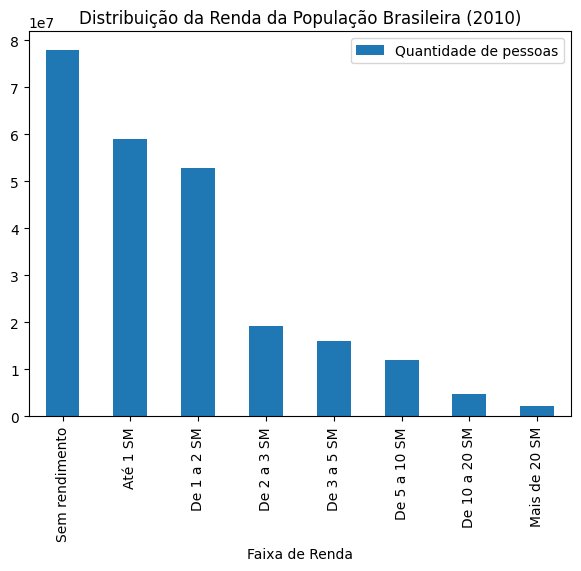

In [322]:
renda_agrupada = df_renda[['Sem rendimento','Até 1 SM', 'De 1 a 2 SM', 'De 2 a 3 SM', 'De 3 a 5 SM', 'De 5 a 10 SM', 'De 10 a 20 SM', 'Mais de 20 SM']].agg('sum')

renda_agrupada_df = renda_agrupada.reset_index()
renda_agrupada_df.columns = ['Faixa de Renda', 'Quantidade de pessoas']

renda_agrupada_df.plot(x='Faixa de Renda', y='Quantidade de pessoas', kind='bar', figsize=(7,5), title='Distribuição da Renda da População Brasileira (2010)')

A **maior parte da população** não possui renda ou recebe até um salário mínimo, enquanto uma parcela mínima da população recebe mais de 20 salários mínimos. <br>Essa desigualdade existe há muitos anos por diversos motivos. Alguns deles nós podemos explorar com os dados que temos do Censo Demográfico de 2010. Vamos nessa?

### **O Peso da Educação**
Devemos ter em mente que o **nível de instrução é um pilar essencial** que afeta diretamente em outros aspectos da vida dos cidadâos. Isso pois a educação abre portas, tanto para o mercado de trabalho, quanto para atividades do dia a dia, entre outros. Vamos nos preparar para analisar o impacto da educação?

Primeramente, vamos visualizar a **distribuição demográfica** dos dados que temos.
### Distribuição demográfica

<Axes: title={'center': 'Quantidade de Residentes por Estado (2010)'}, xlabel='Estado'>

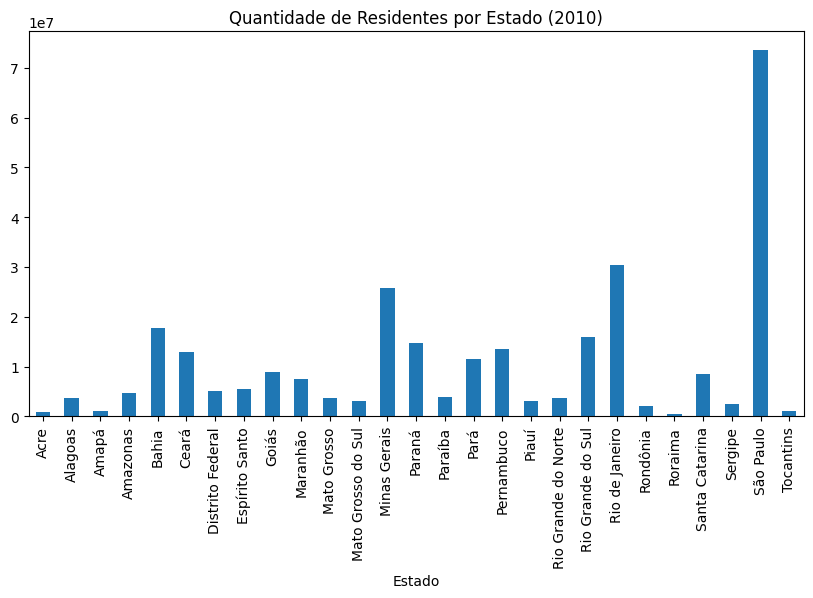

In [323]:
pop_por_estado = df_pop.groupby('Estado')['Total Residente'].sum()

pop_por_estado.columns = ['Estado', 'Quantidade de Residentes']

pop_por_estado.plot(x='Estado', y='Quantidade de Residentes', kind='bar', figsize=(10, 5), title='Quantidade de Residentes por Estado (2010)')

Analisando o gráfico gerado, podemos notar a **grande diferença na quantidade de residentes por estado**. Essa verificação é importante, pois ela nos indica que temos que **normalizar** esses dados para podermos analisar as distribuições reais, ou seja, resultados não distorcidos.

Seguindo!<br>Para a nossa próxima análise, vamos entender: 
### Qual a distribuição por estado das pessoas que ganham acima de 3 salários mínimos?

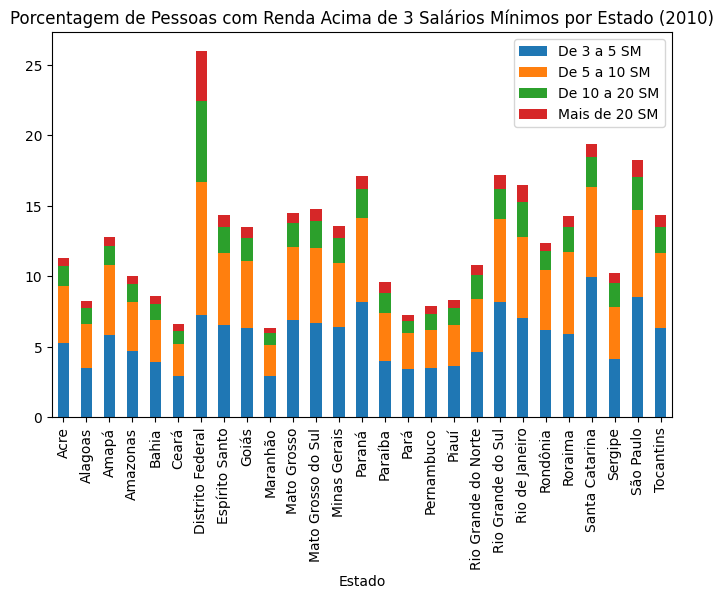

In [324]:
colunas=['De 3 a 5 SM', 'De 5 a 10 SM', 'De 10 a 20 SM', 'Mais de 20 SM']
renda_por_estado = df_renda.groupby('Estado')[colunas].sum()

# dividindo por coluna Total para normalizar
renda_total = df_renda.groupby('Estado')['Total pessoas > 10 anos'].sum()
renda_normalizada = pd.DataFrame()

for coluna in renda_por_estado.columns:
    renda_normalizada[coluna] = (renda_por_estado[coluna] / renda_total) * 100

renda_normalizada.plot(kind='bar', stacked=True, figsize=(8,5), title='Porcentagem de Pessoas com Renda Acima de 3 Salários Mínimos por Estado (2010)').legend(bbox_to_anchor=(1, 1))

Dá pra perceber que temos uma *maior porcentagem de renda concetrada no Distrito Federal*, né?

Vamos manter isso em mente e gerar mais um gráfico que nos mostre a **distribuição de níveis de instrução por estado**, assim podemos ver se existe relação entre renda e educação.
### Qual a distribuição por estado dos níveis de instrução a partir do fundamental completo?

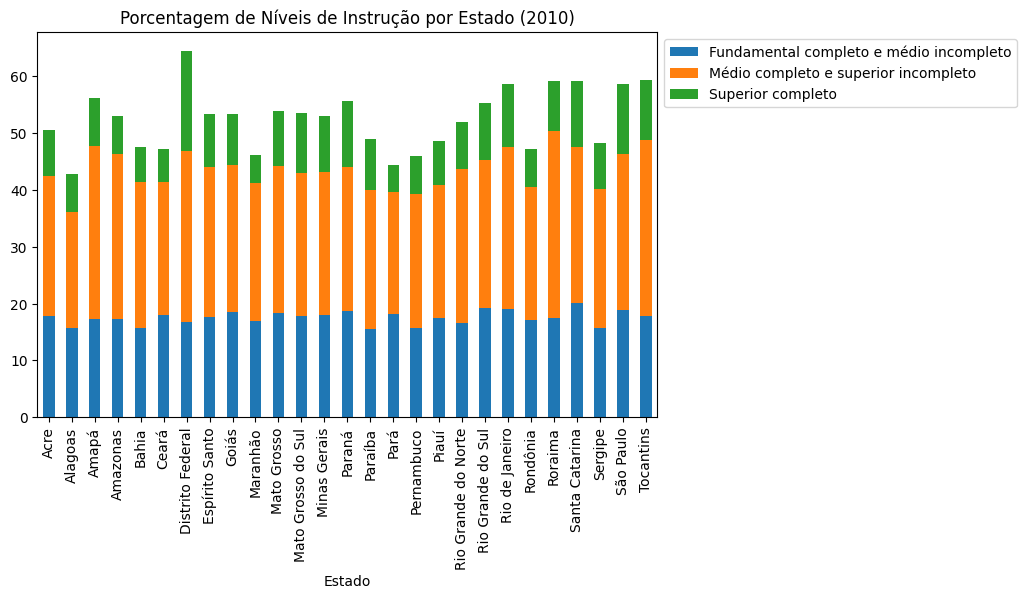

In [325]:
colunas = ['Fundamental completo e médio incompleto', 'Médio completo e superior incompleto', 'Superior completo']
instrucao_por_estado = df_instrucao.groupby('Estado')[colunas].sum()

# dividindo por coluna Total para normalizar
instrucao_total = df_instrucao.groupby('Estado')['Total pessoas > 10 anos'].sum()
instrucao_normalizada = pd.DataFrame()

for coluna in colunas:
    instrucao_normalizada[coluna] = (instrucao_por_estado[coluna] / instrucao_total) * 100

instrucao_normalizada.plot(kind='bar', stacked=True, figsize=(8,5), title='Porcentagem de Níveis de Instrução por Estado (2010)').legend(bbox_to_anchor=(1, 1))

Novamente, o *Distrito Federal se destacou*, contendo a maior porcentagem de altos níveis de instrução em relação aos outros estados. É importante ter em mente que o **DF é a menor unidade federativa do Brasil**,  o que facilita a governança, a melhoria da qualidade de vida, e a distribuição de renda e educação. Esse fator pode ser um dos motivos que explicam o desempenho positivo do DF nesses indicadores.

### Certo! Mas qual a correlação entre renda e nível de instrução?
Analisando os dados de ambos os gráficos, vemos que **estados com maior nível de instrução tendem a ter maior renda**. Isso sugere uma **forte correlação entre nível de instrução e renda**. Vamos ver alguns exemplos no gráfico de dispersão:

### Correlação entre categorias 'Sem rendimento' e 'Sem instrução e fundamental incompleto' das tabelas de renda e instrução

<Axes: title={'center': 'Correlação de Renda e Nível de Instrução'}, xlabel='Sem rendimento', ylabel='Sem instrução e fundamental incompleto'>

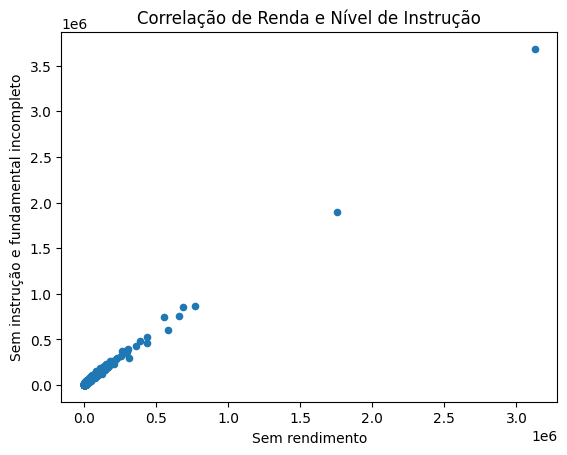

In [326]:
df_merge = pd.merge(df_renda, df_instrucao)
df_merge.plot(x='Sem rendimento', y='Sem instrução e fundamental incompleto', kind='scatter', title='Correlação de Renda e Nível de Instrução')


### Correlação entre categorias 'De 1 e 2 SM' e 'Fundamental completo e médio incompleto' das tabelas de renda e instrução

<Axes: title={'center': 'Correlação de Renda e Nível de Instrução'}, xlabel='De 1 a 2 SM', ylabel='Fundamental completo e médio incompleto'>

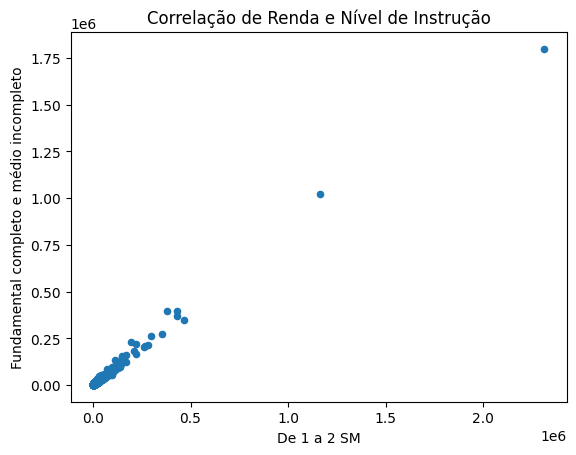

In [327]:
df_merge.plot(x='De 1 a 2 SM', y='Fundamental completo e médio incompleto', kind='scatter', title='Correlação de Renda e Nível de Instrução')

### Correlação entre categorias 'De 10 a 20 SM' e 'Superior completo' das tabelas de renda e instrução

<Axes: title={'center': 'Correlação de Renda e Nível de Instrução'}, xlabel='De 10 a 20 SM', ylabel='Superior completo'>

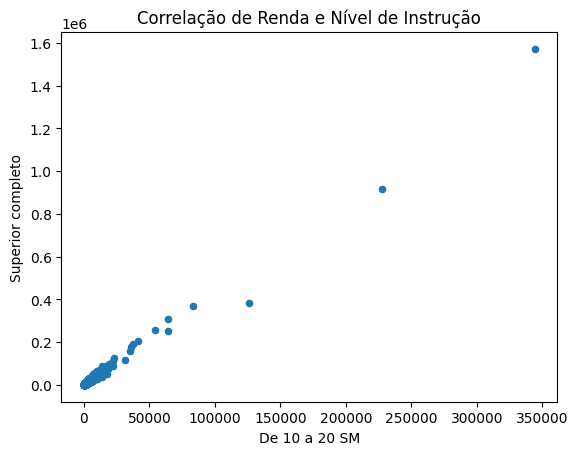

In [328]:
df_merge.plot(x='De 10 a 20 SM', y='Superior completo', kind='scatter',  title='Correlação de Renda e Nível de Instrução')

Os gráficos nos mostram uma **correlação linear positiva**.

Contudo, não podemos afirmar com certeza qual desses fatores é a causa e qual é a consequência. Melhor educação geralmente leva a mais oportunidades de emprego, mas uma maior renda também facilita o acesso a uma educação de qualidade.

É importante reconhecer que muitas famílias no nosso país vivem em **situação de vulnerabilidade**. Um dos fatoes mais essenciais para conforto e atividades do dia a dia é o **acesso a água canalizada**. No entanto, o gráfico abaixo revela que essa condição ainda não é uma realidade para algumas famílias brasileiras.

Você deve estar se pergntando o que exatamanete isso tem a ver com nível de instrução... Já vamos chegar lá.

### Distribuição de água Canalizada: um fator essencial para qualidade de vida

<Axes: title={'center': 'Distribuição de Água Canalizada nos Domicílios do Brasil (2010)'}>

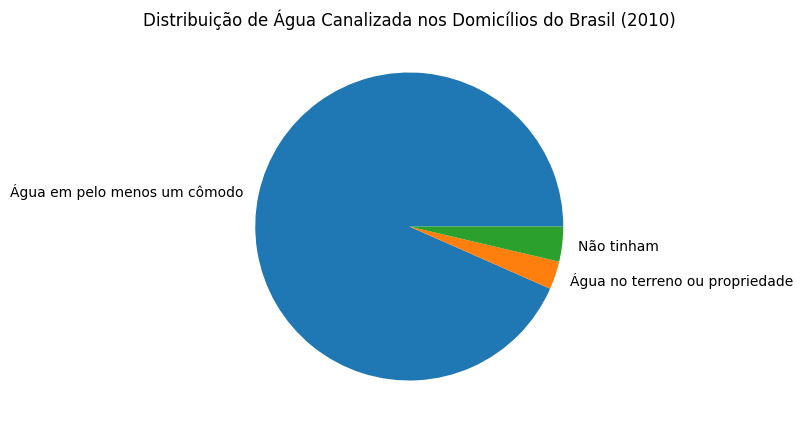

In [329]:
categorias = ['Água em pelo menos um cômodo', 'Água no terreno ou propriedade', 'Não tinham']

dados = df_agua[categorias].agg('sum')

dados.plot(kind='pie', figsize=(5, 5), title='Distribuição de Água Canalizada nos Domicílios do Brasil (2010)')

O gráfico nos mostra que a maioria da população tem acesso a água canalizada em pelo menos um cômodo de sua residência. No entanto, ainda há pessoas que não têm acesso a esse recurso essencial para uma vida de qualidade. Além dos desafios relacionados à má distribuição de renda, enfrentamos também **dificuldades no acesso a recursos básicos**.

Essas condições adversas muitas vezes levam a população a **buscar empregos na tentativa de melhorar suas condições de vida**. Que tal analisarmos a ocupação dos brasileiros por faixa etária?

### A partir de que idade os brasileiros estão trabalhando?

Text(0, 0.5, 'Log10 da Quantidade de Pessoas')

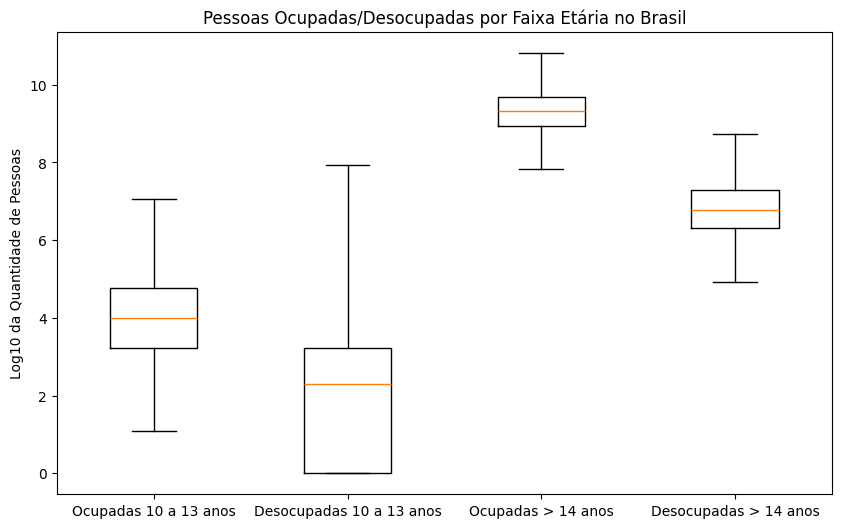

In [330]:
ocupacao_idade = [np.log(df_ocupacao['Ocupadas.1']+1),  # somando 1 para os casos de log(0)
                  np.log(df_ocupacao['Desocupadas.1']+1),
                  np.log(df_ocupacao['Ocupadas.2']+1),
                  np.log(df_ocupacao['Desocupadas.2']+1)]

plt.figure(figsize=(10, 6))
plt.boxplot(ocupacao_idade, labels=['Ocupadas 10 a 13 anos', 'Desocupadas 10 a 13 anos', 'Ocupadas > 14 anos', 'Desocupadas > 14 anos'], showfliers=False)

plt.title('Pessoas Ocupadas/Desocupadas por Faixa Etária no Brasil')
plt.ylabel('Log10 da Quantidade de Pessoas')

**O eixo y apresenta as potências de 10. "4" significa 10^4, e assim por diante.**

A ***mediana das pessoas ocupadas acima de 14 anos é a maior representada no gráfico*** (está próximo a 10^9), isso revela a forte presença da faixa etária acima de 14 anos no mercado de trabalho brasileiro, evidenciando a importância dessa faixa para a economia.

No entanto, o gráfico também aponta a existência, ainda que menor, de **crianças entre 10 e 13 anos ocupadas** (a ***mediana está por volta de 10^4***). Isso possivelmente reflete uma tentativa desesperada das famílias de **complementar sua renda** (embora não possamos afirmar com certeza).

Dado que muitas dessas crianças precisam ajudar financeiramente suas famílias, elas não têm tempo ou energia para se dedicar aos estudos, criando uma lacuna educacional. Isso aumenta o risco de **abandono escolar** ou por desistência, já que encontrarão dificuldades nas disciplinas mais complexas, ou porque acabarão priorizando o trabalho para sobreviver.

Esse ciclo **afeta diretamente o desenvolvimento da população, perpetuando a desigualdade social** e dificultando o rompimento da pobreza, o que limita o crescimento do país como um todo.